### [Avinash Kappa](https://theimgclist.github.io/)  
###  Object Detection using TensorFlow  

I wanted to try Object Detection using TensorFlow.  
Though some of the machine learning outputs look magical, there is a lot of training that happens behind such outputs.  
Such training often takes days/weeks and needs lot of computational resources.  
Pre-trained models are those that are already trained on a dataset and are ready to be used on similar data.  
Thanks to frameworks like TensorFlow that made such models available to everyone.  
I used one such model in this example for object detection.  
The same below steps can be used for setting up your own machine.  
Since we are using a pre-trained model, even a laptop without a GPU works fine for performing object detection.  
[Here](https://github.com/tensorflow/models/tree/master/research/object_detection)  is the link to know more about TensorFlow's Object Detection API.



In [1]:
# Get the code from TensorFlow
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Counting objects: 19000, done.
remote: Total 19000 (delta 0), reused 0 (delta 0), pack-reused 19000
Receiving objects: 100% (19000/19000), 471.08 MiB | 29.33 MiB/s, done.
Resolving deltas: 100% (11181/11181), done.
Checking out files: 100% (2922/2922), done.


In [2]:
# Check if GPU is enabled on Colab
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# Check the directories
# datalab is a default directory on Colab
# models directory contain the code
!ls

datalab  models


In [4]:
# Install the required packages
# Linux commands like ls, apt-get etc can be executed on Colab by prefixing with !
!apt-get install protobuf-compiler python-pil python-lxml python-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-tk is already the newest version (2.7.14-1).
The following additional packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  liblcms2-utils python-genshi python-lxml-dbg python-lxml-doc python-pil-doc
  python-pil-dbg python-setuptools
The following NEW packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 protobuf-compiler python-bs4 python-chardet python-html5lib
  python-lxml python-olefile python-pil python-pkg-resources python-six
  python-webencodings
0 upgraded, 18 newly installed, 0 to remove and 7 not upgraded.
Need to get 3,751 kB of archives.
After this operation, 14.6 MB of additional disk space will be used.
Get:1 

Selecting previously unselected package python-webencodings.
Preparing to unpack .../12-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../13-python-html5lib_0.999999999-1_all.deb ...
Unpacking python-html5lib (0.999999999-1) ...
Selecting previously unselected package python-lxml.
Preparing to unpack .../14-python-lxml_4.0.0-1_amd64.deb ...
Unpacking python-lxml (4.0.0-1) ...
Selecting previously unselected package python-olefile.
Preparing to unpack .../15-python-olefile_0.44-1_all.deb ...
Unpacking python-olefile (0.44-1) ...
Selecting previously unselected package python-pil:amd64.
Preparing to unpack .../16-python-pil_4.1.1-3build2_amd64.deb ...
Unpacking python-pil:amd64 (4.1.1-3build2) ...
Selecting previously unselected package protobuf-compiler.
Preparing to unpack .../17-protobuf-compiler_3.0.0-9ubuntu5_amd64.deb ...
Unpacking protobuf-compiler (3.0.0-9ubuntu5) ...
Se

In [5]:
# More packages..
!pip install Cython
!pip install contextlib2
!pip install jupyter
!pip install matplotlib

    100% |████████████████████████████████| 3.4MB 2.3MB/s 
    100% |████████████████████████████████| 112kB 3.0MB/s 
    100% |████████████████████████████████| 112kB 4.9MB/s 
    100% |████████████████████████████████| 2.2MB 3.9MB/s 


In [6]:
# We work from the research directory
%cd /content/models/research/

/content/models/research


In [0]:
# Adding slim to the system path
# TF-Slim is a high level TensorFlow API that helps in training and evaluating models
import sys
sys.path.append('/content/models/research/slim')

In [0]:
# TensorFlow's Object Detection API uses Protobuf for model configuration
# Protobuf libraries should be run before using the API
!protoc object_detection/protos/*.proto --python_out=.

In [9]:
# If the above command ran successfully, it generates .pbf files for every .proto file in /object_detection/protos directory
# Checking if the files got properly generated
!ls object_detection/protos/

anchor_generator_pb2.py       losses.proto
anchor_generator.proto	      matcher_pb2.py
argmax_matcher_pb2.py	      matcher.proto
argmax_matcher.proto	      mean_stddev_box_coder_pb2.py
bipartite_matcher_pb2.py      mean_stddev_box_coder.proto
bipartite_matcher.proto       model_pb2.py
box_coder_pb2.py	      model.proto
box_coder.proto		      multiscale_anchor_generator_pb2.py
box_predictor_pb2.py	      multiscale_anchor_generator.proto
box_predictor.proto	      optimizer_pb2.py
eval_pb2.py		      optimizer.proto
eval.proto		      pipeline_pb2.py
faster_rcnn_box_coder_pb2.py  pipeline.proto
faster_rcnn_box_coder.proto   post_processing_pb2.py
faster_rcnn_pb2.py	      post_processing.proto
faster_rcnn.proto	      preprocessor_pb2.py
graph_rewriter_pb2.py	      preprocessor.proto
graph_rewriter.proto	      region_similarity_calculator_pb2.py
grid_anchor_generator_pb2.py  region_similarity_calculator.proto
grid_anchor_generator.proto   square_box_coder_pb2.py
hyperparams_pb2.py	      squar

In [10]:
%run setup.py build

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/inputs.py -> build/lib/object_detection
copying object_detection/model_hparams.py -> build/lib/object_detection
copying object_detection/model_lib_test.py -> build/lib/object_detection
copying object_detection/inputs_test.py -> build/lib/object_detection
copying object_detection/trainer_test.py -> build/lib/object_detection
copying object_detection/model_lib.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/model_tpu_main.py -> build/lib/object_detection
copying object_detection/model_main.py -> build/lib/object_detection
copying object_detection/eval.py -> build/lib/object_detection
copying object_detection/evaluator.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/obj

copying object_detection/protos/pipeline_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/input_reader_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/train_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/__init__.py -> build/lib/object_detection/protos
copying object_detection/protos/string_int_label_map_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/losses_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/graph_rewriter_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/image_resizer_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
creating build/lib/object_detection/data_decoders
copying object_detection/data_decoders/__init__.py -> build/l

creating build/lib/object_detection/models
copying object_detection/models/ssd_resnet_v1_fpn_feature_extractor.py -> build/lib/object_detection/models
copying object_detection/models/ssd_inception_v3_feature_extractor_test.py -> build/lib/object_detection/models
copying object_detection/models/feature_map_generators.py -> build/lib/object_detection/models
copying object_detection/models/ssd_inception_v3_feature_extractor.py -> build/lib/object_detection/models
copying object_detection/models/ssd_feature_extractor_test.py -> build/lib/object_detection/models
copying object_detection/models/ssd_resnet_v1_fpn_feature_extractor_testbase.py -> build/lib/object_detection/models
copying object_detection/models/ssd_inception_v2_feature_extractor.py -> build/lib/object_detection/models
copying object_detection/models/ssd_inception_v2_feature_extractor_test.py -> build/lib/object_detection/models
copying object_detection/models/faster_rcnn_resnet_v1_feature_extractor_test.py -> build/lib/object_

copying object_detection/box_coders/__init__.py -> build/lib/object_detection/box_coders
copying object_detection/box_coders/faster_rcnn_box_coder.py -> build/lib/object_detection/box_coders
copying object_detection/box_coders/square_box_coder_test.py -> build/lib/object_detection/box_coders
creating build/lib/object_detection/core
copying object_detection/core/data_decoder.py -> build/lib/object_detection/core
copying object_detection/core/target_assigner_test.py -> build/lib/object_detection/core
copying object_detection/core/target_assigner.py -> build/lib/object_detection/core
copying object_detection/core/box_coder_test.py -> build/lib/object_detection/core
copying object_detection/core/matcher_test.py -> build/lib/object_detection/core
copying object_detection/core/losses_test.py -> build/lib/object_detection/core
copying object_detection/core/box_list_ops.py -> build/lib/object_detection/core
copying object_detection/core/balanced_positive_negative_sampler.py -> build/lib/object

copying object_detection/metrics/oid_vrd_challenge_evaluation_utils_test.py -> build/lib/object_detection/metrics
copying object_detection/metrics/coco_tools_test.py -> build/lib/object_detection/metrics
copying object_detection/metrics/tf_example_parser_test.py -> build/lib/object_detection/metrics
copying object_detection/metrics/coco_evaluation_test.py -> build/lib/object_detection/metrics
copying object_detection/metrics/oid_od_challenge_evaluation_utils_test.py -> build/lib/object_detection/metrics
copying object_detection/metrics/__init__.py -> build/lib/object_detection/metrics
copying object_detection/metrics/offline_eval_map_corloc.py -> build/lib/object_detection/metrics
copying object_detection/metrics/oid_od_challenge_evaluation_utils.py -> build/lib/object_detection/metrics
copying object_detection/metrics/tf_example_parser.py -> build/lib/object_detection/metrics
copying object_detection/metrics/oid_vrd_challenge_evaluation_utils.py -> build/lib/object_detection/metrics
c

copying object_detection/utils/config_util_test.py -> build/lib/object_detection/utils
copying object_detection/utils/per_image_vrd_evaluation.py -> build/lib/object_detection/utils
copying object_detection/utils/vrd_evaluation.py -> build/lib/object_detection/utils
copying object_detection/utils/shape_utils_test.py -> build/lib/object_detection/utils
copying object_detection/utils/np_box_mask_list_test.py -> build/lib/object_detection/utils
copying object_detection/utils/__init__.py -> build/lib/object_detection/utils
copying object_detection/utils/visualization_utils_test.py -> build/lib/object_detection/utils
copying object_detection/utils/object_detection_evaluation_test.py -> build/lib/object_detection/utils
copying object_detection/utils/metrics.py -> build/lib/object_detection/utils
copying object_detection/utils/np_box_list_ops_test.py -> build/lib/object_detection/utils
copying object_detection/utils/np_box_list.py -> build/lib/object_detection/utils
copying object_detection/u

copying object_detection/dataset_tools/create_coco_tf_record.py -> build/lib/object_detection/dataset_tools
running egg_info
creating object_detection.egg-info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'


In [11]:
%run setup.py install

running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/object_detection
creating build/bdist.linux-x86_64/egg/object_detection/anchor_generators
copying build/lib/object_detection/anchor_generators/grid_anchor_generator.py -> build/bdist.linux-x86_64/egg/object_detection/anchor_generators
copying build/lib/object_detection/anchor_generators/grid_anchor_generator_test.py -> build/bdist.linux-x86_64/egg/object_detection/anchor_

copying build/lib/object_detection/protos/string_int_label_map_pb2.py -> build/bdist.linux-x86_64/egg/object_detection/protos
copying build/lib/object_detection/protos/losses_pb2.py -> build/bdist.linux-x86_64/egg/object_detection/protos
copying build/lib/object_detection/protos/anchor_generator_pb2.py -> build/bdist.linux-x86_64/egg/object_detection/protos
copying build/lib/object_detection/protos/graph_rewriter_pb2.py -> build/bdist.linux-x86_64/egg/object_detection/protos
copying build/lib/object_detection/protos/image_resizer_pb2.py -> build/bdist.linux-x86_64/egg/object_detection/protos
copying build/lib/object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/bdist.linux-x86_64/egg/object_detection/protos
copying build/lib/object_detection/inputs.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/model_hparams.py -> build/bdist.linux-x86_64/egg/object_detection
creating build/bdist.linux-x86_64/egg/object_detection/data_decoders
copying bu

copying build/lib/object_detection/builders/optimizer_builder_test.py -> build/bdist.linux-x86_64/egg/object_detection/builders
copying build/lib/object_detection/builders/model_builder_test.py -> build/bdist.linux-x86_64/egg/object_detection/builders
copying build/lib/object_detection/builders/region_similarity_calculator_builder_test.py -> build/bdist.linux-x86_64/egg/object_detection/builders
copying build/lib/object_detection/builders/image_resizer_builder_test.py -> build/bdist.linux-x86_64/egg/object_detection/builders
copying build/lib/object_detection/model_lib_test.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/inputs_test.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/trainer_test.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/model_lib.py -> build/bdist.linux-x86_64/egg/object_detection
creating build/bdist.linux-x86_64/egg/object_detection/models
copying b

creating build/bdist.linux-x86_64/egg/object_detection/matchers
copying build/lib/object_detection/matchers/bipartite_matcher.py -> build/bdist.linux-x86_64/egg/object_detection/matchers
copying build/lib/object_detection/matchers/argmax_matcher_test.py -> build/bdist.linux-x86_64/egg/object_detection/matchers
copying build/lib/object_detection/matchers/bipartite_matcher_test.py -> build/bdist.linux-x86_64/egg/object_detection/matchers
copying build/lib/object_detection/matchers/__init__.py -> build/bdist.linux-x86_64/egg/object_detection/matchers
copying build/lib/object_detection/matchers/argmax_matcher.py -> build/bdist.linux-x86_64/egg/object_detection/matchers
copying build/lib/object_detection/eval_util_test.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/model_tpu_main.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/model_main.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object

copying build/lib/object_detection/core/losses.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/region_similarity_calculator.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/balanced_positive_negative_sampler_test.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/region_similarity_calculator_test.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/preprocessor_cache.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/__init__.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/minibatch_sampler.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/model.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/preprocessor_test.py -

copying build/lib/object_detection/meta_architectures/rfcn_meta_arch_test.py -> build/bdist.linux-x86_64/egg/object_detection/meta_architectures
copying build/lib/object_detection/meta_architectures/__init__.py -> build/bdist.linux-x86_64/egg/object_detection/meta_architectures
copying build/lib/object_detection/meta_architectures/faster_rcnn_meta_arch_test_lib.py -> build/bdist.linux-x86_64/egg/object_detection/meta_architectures
copying build/lib/object_detection/meta_architectures/faster_rcnn_meta_arch.py -> build/bdist.linux-x86_64/egg/object_detection/meta_architectures
copying build/lib/object_detection/meta_architectures/rfcn_meta_arch.py -> build/bdist.linux-x86_64/egg/object_detection/meta_architectures
copying build/lib/object_detection/meta_architectures/ssd_meta_arch.py -> build/bdist.linux-x86_64/egg/object_detection/meta_architectures
creating build/bdist.linux-x86_64/egg/object_detection/utils
copying build/lib/object_detection/utils/np_box_mask_list_ops_test.py -> build

copying build/lib/object_detection/utils/np_box_list_ops_test.py -> build/bdist.linux-x86_64/egg/object_detection/utils
copying build/lib/object_detection/utils/np_box_list.py -> build/bdist.linux-x86_64/egg/object_detection/utils
copying build/lib/object_detection/utils/category_util.py -> build/bdist.linux-x86_64/egg/object_detection/utils
copying build/lib/object_detection/utils/label_map_util_test.py -> build/bdist.linux-x86_64/egg/object_detection/utils
copying build/lib/object_detection/utils/config_util.py -> build/bdist.linux-x86_64/egg/object_detection/utils
copying build/lib/object_detection/utils/test_utils_test.py -> build/bdist.linux-x86_64/egg/object_detection/utils
copying build/lib/object_detection/utils/static_shape.py -> build/bdist.linux-x86_64/egg/object_detection/utils
copying build/lib/object_detection/utils/context_manager.py -> build/bdist.linux-x86_64/egg/object_detection/utils
copying build/lib/object_detection/utils/np_box_ops_test.py -> build/bdist.linux-x86

copying build/lib/object_detection/dataset_tools/create_coco_tf_record.py -> build/bdist.linux-x86_64/egg/object_detection/dataset_tools
byte-compiling build/bdist.linux-x86_64/egg/object_detection/anchor_generators/grid_anchor_generator.py to grid_anchor_generator.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/anchor_generators/grid_anchor_generator_test.py to grid_anchor_generator_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/anchor_generators/multiple_grid_anchor_generator.py to multiple_grid_anchor_generator.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/anchor_generators/multiscale_grid_anchor_generator_test.py to multiscale_grid_anchor_generator_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/anchor_generators/__init__.py to __init__.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/anchor_generators/multiple_grid_anchor_generator

byte-compiling build/bdist.linux-x86_64/egg/object_detection/protos/faster_rcnn_box_coder_pb2.py to faster_rcnn_box_coder_pb2.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/inputs.py to inputs.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/model_hparams.py to model_hparams.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/data_decoders/__init__.py to __init__.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/data_decoders/tf_example_decoder_test.py to tf_example_decoder_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/data_decoders/tf_example_decoder.py to tf_example_decoder.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/builders/box_coder_builder.py to box_coder_builder.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/builders/preprocessor_builder_test.py to preprocessor_builder_test.cpytho

byte-compiling build/bdist.linux-x86_64/egg/object_detection/inputs_test.py to inputs_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/trainer_test.py to trainer_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/model_lib.py to model_lib.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/ssd_resnet_v1_fpn_feature_extractor.py to ssd_resnet_v1_fpn_feature_extractor.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/ssd_inception_v3_feature_extractor_test.py to ssd_inception_v3_feature_extractor_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/feature_map_generators.py to feature_map_generators.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/ssd_inception_v3_feature_extractor.py to ssd_inception_v3_feature_extractor.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection

byte-compiling build/bdist.linux-x86_64/egg/object_detection/matchers/bipartite_matcher_test.py to bipartite_matcher_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/matchers/__init__.py to __init__.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/matchers/argmax_matcher.py to argmax_matcher.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/eval_util_test.py to eval_util_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/model_tpu_main.py to model_tpu_main.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/model_main.py to model_main.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/eval.py to eval.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/box_coders/keypoint_box_coder_test.py to keypoint_box_coder_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/box_coders/

byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/preprocessor_cache.py to preprocessor_cache.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/__init__.py to __init__.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/minibatch_sampler.py to minibatch_sampler.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/model.py to model.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/preprocessor_test.py to preprocessor_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/matcher.py to matcher.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/box_list.py to box_list.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/box_list_ops_test.py to box_list_ops_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/keypoint_ops.py to keypoint_

byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/rfcn_meta_arch.py to rfcn_meta_arch.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/ssd_meta_arch.py to ssd_meta_arch.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/np_box_mask_list_ops_test.py to np_box_mask_list_ops_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/np_box_ops.py to np_box_ops.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/np_box_mask_list.py to np_box_mask_list.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/dataset_util.py to dataset_util.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/test_utils.py to test_utils.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/ops.py to ops.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/obje

  File "build/bdist.linux-x86_64/egg/object_detection/meta_architectures/ssd_meta_arch_test.py", line 516
    print num_classes, num_anchors
                    ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int num_classes, num_anchors)?



byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/learning_schedules.py to learning_schedules.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/np_mask_ops.py to np_mask_ops.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/object_detection_evaluation.py to object_detection_evaluation.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/json_utils.py to json_utils.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/test_case.py to test_case.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/static_shape_test.py to static_shape_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/category_util_test.py to category_util_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/config_util_test.py to config_util_test.cpython-36.pyc
byte-compiling build/bdist.l

  File "build/bdist.linux-x86_64/egg/object_detection/utils/object_detection_evaluation.py", line 842
    print 'Scores and tpfp per class label: {}'.format(class_index)
                                              ^
SyntaxError: invalid syntax



byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/visualization_utils.py to visualization_utils.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/np_mask_ops_test.py to np_mask_ops_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/inference/infer_detections.py to infer_detections.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/inference/detection_inference.py to detection_inference.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/inference/detection_inference_test.py to detection_inference_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/inference/__init__.py to __init__.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/exporter_test.py to exporter_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/eval_util.py to eval_util.cpython-36.pyc
byte-compiling build/bdist.l

  File "build/bdist.linux-x86_64/egg/object_detection/dataset_tools/oid_hierarchical_labels_expansion.py", line 157
    print '--annotation_type expected value is 1 or 2.'
                                                      ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int '--annotation_type expected value is 1 or 2.')?

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.preprocessor.cpython-36: module MAY be using inspect.stack


creating dist
creating 'dist/object_detection-0.1-py3.6.egg' and adding 'build/bdist.linux-x86_64/egg' to it
removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing object_detection-0.1-py3.6.egg
creating /usr/local/lib/python3.6/dist-packages/object_detection-0.1-py3.6.egg
Extracting object_detection-0.1-py3.6.egg to /usr/local/lib/python3.6/dist-packages


  File "/usr/local/lib/python3.6/dist-packages/object_detection-0.1-py3.6.egg/object_detection/dataset_tools/oid_hierarchical_labels_expansion.py", line 157
    print '--annotation_type expected value is 1 or 2.'
                                                      ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int '--annotation_type expected value is 1 or 2.')?

  File "/usr/local/lib/python3.6/dist-packages/object_detection-0.1-py3.6.egg/object_detection/meta_architectures/ssd_meta_arch_test.py", line 516
    print num_classes, num_anchors
                    ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int num_classes, num_anchors)?



Adding object-detection 0.1 to easy-install.pth file

Installed /usr/local/lib/python3.6/dist-packages/object_detection-0.1-py3.6.egg
Processing dependencies for object-detection==0.1
Searching for Cython==0.28.4
Best match: Cython 0.28.4
Adding Cython 0.28.4 to easy-install.pth file
Installing cygdb script to /usr/local/bin
Installing cython script to /usr/local/bin
Installing cythonize script to /usr/local/bin

Using /usr/local/lib/python3.6/dist-packages


  File "/usr/local/lib/python3.6/dist-packages/object_detection-0.1-py3.6.egg/object_detection/utils/object_detection_evaluation.py", line 842
    print 'Scores and tpfp per class label: {}'.format(class_index)
                                              ^
SyntaxError: invalid syntax



Searching for matplotlib==2.1.2
Best match: matplotlib 2.1.2
Adding matplotlib 2.1.2 to easy-install.pth file

Using /usr/local/lib/python3.6/dist-packages
Searching for Pillow==4.0.0
Best match: Pillow 4.0.0
Adding Pillow 4.0.0 to easy-install.pth file

Using /usr/local/lib/python3.6/dist-packages
Searching for numpy==1.14.5
Best match: numpy 1.14.5
Adding numpy 1.14.5 to easy-install.pth file

Using /usr/local/lib/python3.6/dist-packages
Searching for pytz==2018.5
Best match: pytz 2018.5
Adding pytz 2018.5 to easy-install.pth file

Using /usr/local/lib/python3.6/dist-packages
Searching for cycler==0.10.0
Best match: cycler 0.10.0
Adding cycler 0.10.0 to easy-install.pth file

Using /usr/local/lib/python3.6/dist-packages
Searching for six==1.11.0
Best match: six 1.11.0
Adding six 1.11.0 to easy-install.pth file

Using /usr/local/lib/python3.6/dist-packages
Searching for python-dateutil==2.5.3
Best match: python-dateutil 2.5.3
Adding python-dateutil 2.5.3 to easy-install.pth file

Usin

In [12]:
# Let's test if we did everything right!
%run object_detection/builders/model_builder_test.py

/content/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_confi

* We got the code from TensorFlow repository and got environment ready by installing the packages that are needed.  
* We also used the test file shared with the code to make sure everything went well.  
* Below is the actual code for object detection
* The entire code below is taken from the notebook  **object_detection_tutorial.ipynb** that was shared in the repository

# Imports

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if tf.__version__ < '1.4.0':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')


## Env setup

In [0]:
# This is needed to display the images.
%matplotlib inline

In [15]:
%cd object_detection/

/content/models/research/object_detection


## Object detection imports
Here are the imports from the object detection module.

In [16]:
from utils import label_map_util
from utils import visualization_utils as vis_util

/content/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/dist

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [0]:
# What model to download.
MODEL_NAME = 'ssd_inception_v2_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

## Download Model

In [0]:
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

## Load a (frozen) Tensorflow model into memory.

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [0]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Helper code

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

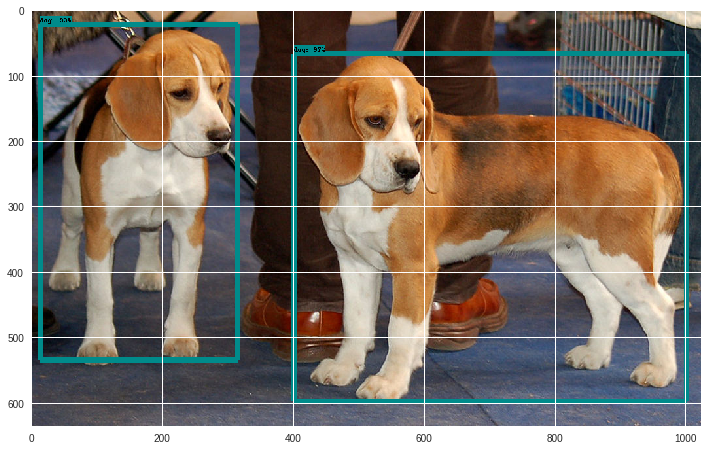

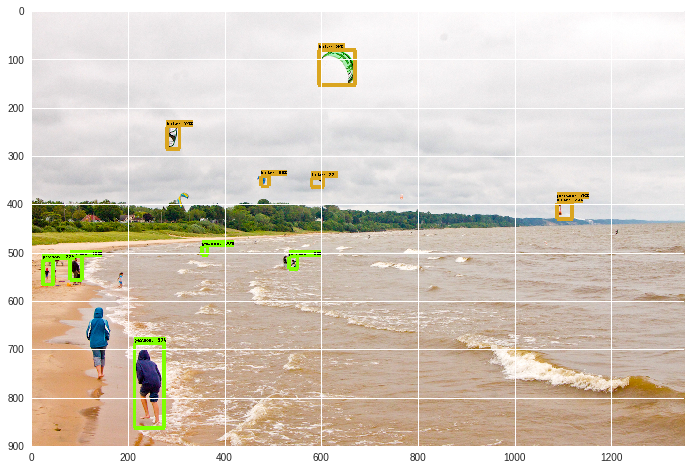

In [24]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

* The test_images directory contains 2 images  
* We see object detection done for those 2 images  
* **Want to try it on your own image? Let's upload a new one and try!**

In [32]:
# Uploading an image

from google.colab import files
files.upload()

Saving image3.jpg to image3.jpg


{'image3.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x10\x10\x15\x0f\x10\x12\x10\x10\x10\x0f\x0f\x0f\x10\x0f\x0f\x0f\x10\x0f\x0f\x10\x15\x0f\x15\x15\x17\x16\x15\x11\x15\x15\x18\x1d( \x18\x1a%\x1b\x15\x15!1!%)+/..\x17\x1f383,7(-.+\x01\n\n\n\x0e\r\x0e\x17\x10\x10\x17-\x1d\x1f\x1d------+-------------------------------------------\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x01\x02\x05\x00\x06\x07\xff\xc4\x00@\x10\x00\x01\x04\x00\x03\x06\x04\x03\x05\x06\x04\x06\x03\x00\x00\x00\x01\x00\x02\x03\x11\x04\x12!\x05\x131AQa"q\x81\x91\x062\xa1\x14Rb\xb1\xc1#B\x82\x92\xd1\xf03Sr\xe1\x15$Cs\xa2\xb2%Dc\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00.\x11\x00\x02\x02\x01\x04\x01\x02\x04\x06\x03\x01\x01\x00\x00\x00\x00\x00\x01\x02\x11\x03\x04\x

In [0]:
# Copying the uploaded image3.jpg image to test_images directory
# Change the name of the uploaded file

!cp image3.jpg test_images/

In [0]:
# Setting the path of uploaded image
# Make sure image3.jpg is replaced with uploaded image filename

image_path = "/content/models/research/object_detection/test_images/image3.jpg"

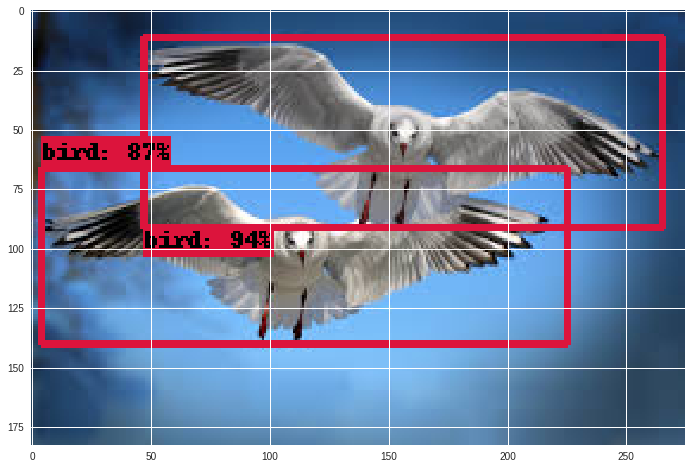

In [37]:
# Reused some portion of above code with changes for working on the uploaded image

image = Image.open(image_path)
# the array based representation of the image will be used later in order to prepare the
# result image with boxes and labels on it.
image_np = load_image_into_numpy_array(image)
# Expand dimensions since the model expects images to have shape: [1, None, None, 3]
image_np_expanded = np.expand_dims(image_np, axis=0)
# Actual detection.
output_dict = run_inference_for_single_image(image_np, detection_graph)
# Visualization of the results of a detection.
vis_util.visualize_boxes_and_labels_on_image_array(
  image_np,
  output_dict['detection_boxes'],
  output_dict['detection_classes'],
  output_dict['detection_scores'],
  category_index,
  instance_masks=output_dict.get('detection_masks'),
  use_normalized_coordinates=True,
  line_thickness=3)
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_np)

**Conclusion :**  
* In the above code, we used the pretrained model **ssd_inception_v2_coco_2018_01_28** for object detection  
* There are many other such models which TensorFlow has made available    
* [Here](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) is the link to check the other pre-trained models    
* In **Variables** section, modify the variable **MODEL_NAME** by replacing it with the pre-trained model you want to try    
* There are pre-trained models that were trained on different datasets like COCO, Kitti, Open Images dataset    
* I will be building on this notebook to train the model on a different dataset for detection of some object/s of interest    

***Something didn't work or you have some suggestions or ideas? Do let me know :D***

**This notebook is created as part of #100DaysOfMLCode pledge. You can find my progress [here](https://github.com/theimgclist/100DaysOfMLCode). And hey, I have a [blog](http://theimgclist.github.io/) too.**   


